## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


Ideas for determing. what types of films are currently doing the best at the box office:
1. Genre
2. Budget
3. Release Date
4. Famous names involved in movie
5. Number of crew members??
6. Length

Dataframes that should be joined:
1. Dataframes with tconst/nconst are:
    -additional_movie_info_df
    -director_writer_df
    -additional_crew_info_df
    -crew_info_df
    So the plan is to:
        Make two data frames
        1. The addition_movie_info will get two new columns directors/writers
            First I need to use crew_info to get the names of directors/writers in directer_writer df
2. The first point I will make will be genre correlation to profit
    DataFrames with relevant info are:
    1.additional_movie_info_df
    2.movie_profits_df
    3.descriptive_movie_info_df
    4.even_more_movie_info_df
    5.budget_and_profit
    -First I need to make a unique list of movies with profits listed. XXX
    -Now I need to make a dataframe with the following features:
        movie_title
        movie_genre
        domestic_gross
        foreign_gross
        year
    _ SO, I need to get the genres for the movies
       The three df with genres are 
       descriptive_movie_info_df and even_more_movie_info_df and
       XXadditional_movie_info_dfXX
       
            

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
even_more_movie_info_df=pd.read_csv("zippedData/tmdb.movies.csv.gz")
descriptive_movie_info_df=pd.read_csv("zippedData/rt.movie_info.tsv.gz",sep='\t')
detailed_review_df=pd.read_csv("zippedData/rt.reviews.tsv.gz",sep='\t',encoding = "ISO-8859-1")
movie_ratings_df=pd.read_csv("zippedData/imdb.title.ratings.csv.gz")
additional_crew_info_df=pd.read_csv("zippedData/imdb.title.principals.csv.gz")
additional_movie_info_df=pd.read_csv("zippedData/imdb.title.basics.csv.gz")
movie_info_df = pd.read_csv("zippedData/imdb.title.akas.csv.gz")
crew_info_df=pd.read_csv("zippedData/imdb.name.basics.csv.gz")
movie_profits_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
budget_and_profit=pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

Data sets I used are:
budget_and_profit.info 5782
movie_profits_df 3387
additional_movie_info_df
descriptive_movie_info_df

In [7]:
#This function formats graph data to show B for billion, M for million,
# and k for thousand

def format_num(data_value,indx):
    if data_value >= 1_000_000_000:
        formatter = '{:1.2f}B'.format(data_value*.000000001)
    elif data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000001)
    else:
        formatter = '{:1.0f}K'.format(data_value*.001)
    return formatter


In [8]:
#This function cleans the neccessary columns of budget_and_profit
def clean_it(em):
    #cleans budget
    budget = em['production_budget'].str.\
replace(',','')
    budget=budget.apply(lambda x: x.strip('$'))
    em['production_budget']=budget.astype('int64')
    #cleans domestic gross
    budget = em['domestic_gross'].str.\
replace(',','')
    budget=budget.apply(lambda x: x.strip('$'))
    em['domestic_gross']=budget.astype('int64')
    #cleans worldwide gross
    budget = em['worldwide_gross'].str.\
replace(',','')
    budget=budget.apply(lambda x: x.strip('$'))
    em['worldwide_gross']=budget.astype('int64')
    

In [9]:
#This code cleans the production_budget column so they can become integers
clean_it(budget_and_profit)
budget_and_profit.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [37]:
def budget_corr(budget_and_profit):
    plt.figure(figsize=(12,10))
    cor = budget_and_profit[['production_budget','domestic_gross','worldwide_gross']].corr()
    sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
    plt.show()
    cor_target = abs(cor["production_budget"])
    relevant_features = cor_target[cor_target>.5]
    return(relevant_features)
    

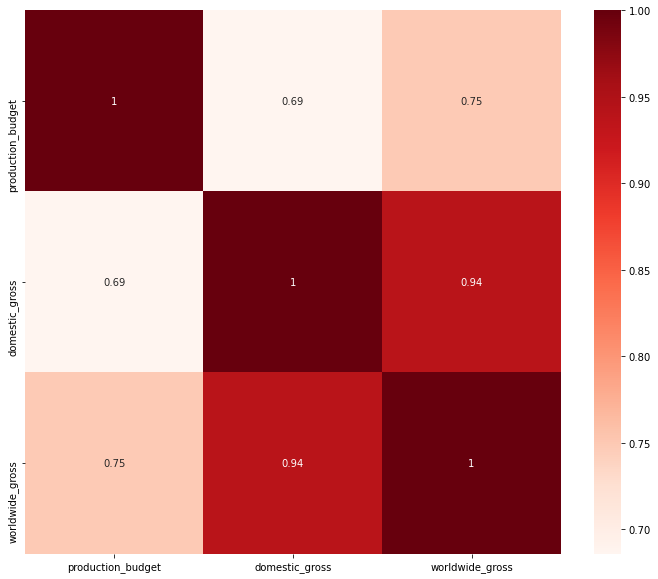

production_budget    1.000000
domestic_gross       0.685682
worldwide_gross      0.748306
Name: production_budget, dtype: float64

In [38]:
budget_corr(budget_and_profit)

In [39]:
def budget_line(budget_and_profit):
    w_gross=budget_and_profit['worldwide_gross']
    d_gross=budget_and_profit['domestic_gross']
    b=budget_and_profit['production_budget']
    df = pd.DataFrame({
    'worldwide gross': list(w_gross),
    'domestic gross': list(d_gross)},
    index=list(b))

    ax=df.plot.line(figsize=(10,5))
    plt.xlabel("Budget(USD)")
    plt.xticks(np.linspace(0,425000000,num=10))
    plt.yticks(np.linspace(0,2776345279,num=10))
    plt.title("Budget vs worldwide and domestic gross")
    ax.yaxis.set_major_formatter(format_num)
    ax.xaxis.set_major_formatter(format_num)
    plt.ylabel("Gross $ Amount(USD)")
    
    

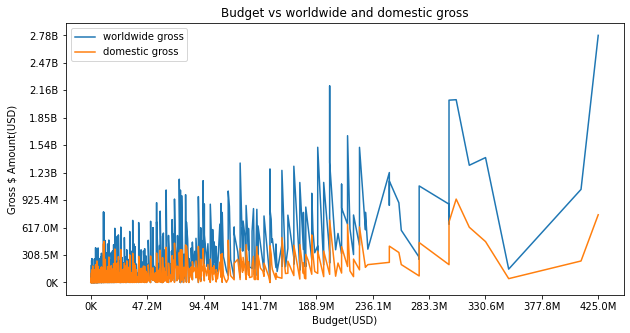

In [40]:
budget_line(budget_and_profit)

***************************************
Everything above will be used as evidence to support that a bigger budget
does correlate to bigger gross
*****************************************

In [3]:
def unique_names(movie_profits_df,budget_and_profit):
    unique_names=[]
    for movie in movie_profits_df.title:
        if movie in list(movie_profits_df.loc[movie_profits_df.domestic_gross.isna()==False].title)\
        and\
        movie in list(movie_profits_df.loc[movie_profits_df.foreign_gross.isna()==False].title):
            unique_names.append(str(movie))
        
    for movie in budget_and_profit.movie:
        if movie in  list(budget_and_profit.loc[ budget_and_profit.domestic_gross.isna()==False].movie) \
        and\
        movie in list(budget_and_profit.loc[ budget_and_profit.worldwide_gross.isna()==False].movie):
            unique_names.append(str(movie))
    

    unique_names=list(set(unique_names))
    unique_names.sort()
    return unique_names

    

In [11]:
len(unique_names)

6630

In [18]:
len(better_runtime_titles)

114405

In [17]:
better_runtime_titles  = better_runtime_titles(additional_movie_info_df)

In [16]:
def better_runtime_titles(additional_movie_info_df):
    better_titles = additional_movie_info_df.loc[additional_movie_info_df["runtime_minutes"].\
                                        isna() == False].primary_title
    return better_titles

In [24]:
#this is making a list of movies that we know runtime_minutes and profit for
known_titles=[]
for title in better_runtime_titles:
    
    if title in unique_names:
        known_titles.append(title)

In [25]:
run_df=pd.DataFrame({
    'Title':known_titles,
    'runtime': None,
    'domestic_gross': None,
    'worldwide_gross': None
  
})

In [26]:
construct_run(budget_and_profit ,movie_profits_df,\
                  additional_movie_info_df, run_df)


In [27]:
run_df.head()

,Title,runtime,domestic_gross,worldwide_gross
0,Foodfight!,"20 91.0 Name: runtime_minutes, dtype: float64","1325 0 Name: domestic_gross, dtype: int64","1325 73706 Name: worldwide_gross, dtype: int64"
1,The Overnight,40 88.0 67603 79.0 Name: runtime_minu...,"5620 1109808 Name: domestic_gross, dtype: i...","5620 1165996 Name: worldwide_gross, dtype: ..."
2,On the Road,48 124.0 39490 90.0 68078 87.0 7...,"2316 720828 Name: domestic_gross, dtype: int64","2316 9313302 Name: worldwide_gross, dtype: ..."
3,The Secret Life of Walter Mitty,"54 114.0 Name: runtime_minutes, dtype: float64","436 58236838 Name: domestic_gross, dtype: i...","436 187861183 Name: worldwide_gross, dtype:..."
4,A Walk Among the Tombstones,"58 114.0 Name: runtime_minutes, dtype: float64","2066 26017685 Name: domestic_gross, dtype: ...","2066 62108587 Name: worldwide_gross, dtype:..."


In [28]:
def construct_run(budget_and_profit ,movie_profits_df,\
                  additional_movie_info_df, run_df,known_titles):
    ordered_domestic=[]
    ordered_runtime=[]
    ordered_worldwide=[]

    titles_one=list(budget_and_profit.movie)


    titles_two=list(movie_profits_df.title)


    for title in known_titles:
        ordered_runtime.append(
        additional_movie_info_df.loc[additional_movie_info_df.primary_title==title]\
            .runtime_minutes)
        if title in titles_one:
            ordered_domestic.append(
            budget_and_profit.loc[budget_and_profit.movie==title].domestic_gross)
            ordered_worldwide.append(
            budget_and_profit.loc[budget_and_profit.movie==title].worldwide_gross)
        elif title in titles_two:
            ordered_domestic.append(
            movie_profits_df.loc[movie_profits_df.title==title].domestic_gross)
            ordered_worldwide.append(
            movie_profits_df.loc[movie_profits_df.title==title].foreign_gross)
            
    run_df.domestic_gross=ordered_domestic
    run_df.runtime=ordered_runtime
    run_df.worldwide_gross=ordered_worldwide
    

In [29]:
run_df.domestic_gross=ordered_domestic
run_df.runtime=ordered_runtime
run_df.worldwide_gross=ordered_worldwide
run_df.head()

,Title,runtime,domestic_gross,worldwide_gross
0,Foodfight!,"20 91.0 Name: runtime_minutes, dtype: float64","1325 0 Name: domestic_gross, dtype: int64","1325 73706 Name: worldwide_gross, dtype: int64"
1,The Overnight,40 88.0 67603 79.0 Name: runtime_minu...,"5620 1109808 Name: domestic_gross, dtype: i...","5620 1165996 Name: worldwide_gross, dtype: ..."
2,On the Road,48 124.0 39490 90.0 68078 87.0 7...,"2316 720828 Name: domestic_gross, dtype: int64","2316 9313302 Name: worldwide_gross, dtype: ..."
3,The Secret Life of Walter Mitty,"54 114.0 Name: runtime_minutes, dtype: float64","436 58236838 Name: domestic_gross, dtype: i...","436 187861183 Name: worldwide_gross, dtype:..."
4,A Walk Among the Tombstones,"58 114.0 Name: runtime_minutes, dtype: float64","2066 26017685 Name: domestic_gross, dtype: ...","2066 62108587 Name: worldwide_gross, dtype:..."


In [30]:
def remove_NaN(run_df):
    for idx in range(len(run_df.worldwide_gross)):
        if type(run_df.worldwide_gross[idx]) != int:
            if len(run_df.worldwide_gross[idx]) > 1:
                run_df.worldwide_gross[idx]=run_df.worldwide_gross[idx].dropna()
    

In [44]:
# This removes NaN values from the worldwide_gross column
for idx in range(len(run_df.worldwide_gross)):
    if type(run_df.worldwide_gross[idx]) != int:
        if len(run_df.worldwide_gross[idx]) > 1:
            run_df.worldwide_gross[idx]=run_df.worldwide_gross[idx].dropna()

In [42]:
#pseudo-code
#1.Take the column(series) that needs to be clean
#2.Go thru every element of the column and set it
#to itself casted as int.

def clean_run(rune):
#This function fixes the datatypes of the run_df by casting to int
    index=0
    for i in rune:
        if type(i) != int:
            if len(i) > 1:
                rune[index]=int(rune[index][rune[index].idxmin()])
            else:
                rune[index]=int(rune[index])
            index+=1
        else:
            rune[index]=int(rune[index])
            index+=1
        


In [45]:
clean_run(run_df.runtime)
clean_run(run_df.domestic_gross)
clean_run(run_df.worldwide_gross)
run_df.head()

,Title,runtime,domestic_gross,worldwide_gross
0,Foodfight!,91,0,73706
1,The Overnight,79,1109808,1165996
2,On the Road,39,720828,9313302
3,The Secret Life of Walter Mitty,114,58236838,187861183
4,A Walk Among the Tombstones,114,26017685,62108587


In [51]:
def run_all(run_df):
    df = pd.DataFrame({
    'worldwide gross': list(run_df.worldwide_gross),
    'domestic gross': list(run_df.domestic_gross)},
    index=list(run_df.runtime))
    ax=df.plot.line(figsize=(10,5))
    ax.yaxis.set_major_formatter(format_num)
    plt.xlabel("Runtime (minutes)")
    plt.title("Runtime vs worldwide and domestic gross")
    plt.ylabel("Gross $ Amount ()")
    

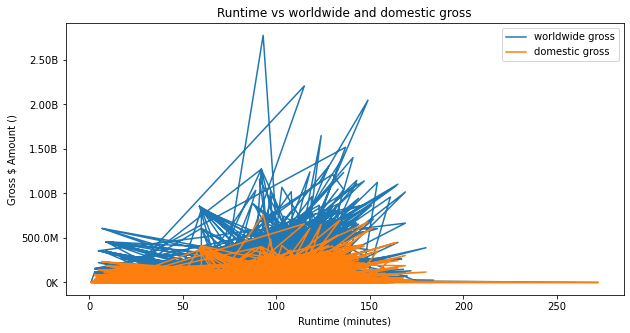

In [52]:
run_all(run_df)

Text(0, 0.5, 'Gross $ Amount ()')

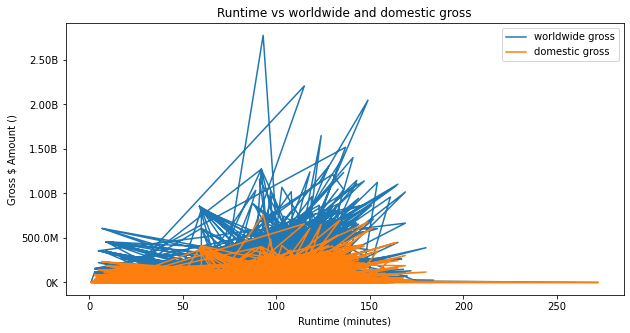

In [33]:
#This is a line graph containing all data in run_df 
#There are 3796 movies in this list
df = pd.DataFrame({
    'worldwide gross': list(run_df.worldwide_gross),
    'domestic gross': list(run_df.domestic_gross)},
    index=list(run_df.runtime))
ax=df.plot.line(figsize=(10,5))
ax.yaxis.set_major_formatter(format_num)
plt.xlabel("Runtime (minutes)")
plt.title("Runtime vs worldwide and domestic gross")
plt.ylabel("Gross $ Amount ()")

In [55]:
#These methods will return the average gross provided a runtime range of count - count+60

def populate_average_world(data,count):
    count = count
    average = data.loc[(data.runtime>count) & (data.runtime<=count+60)].\
    worldwide_gross.mean()
    return average

def populate_average_dom(data,count):
    count = count
    average = data.loc[(data.runtime>count) & (data.runtime<=count+60)].\
    domestic_gross.mean()
    return average

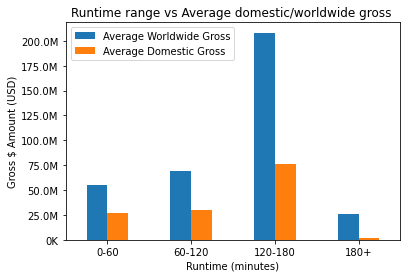

In [58]:
run_avg(avg_world,avg_domestic,index)


In [57]:
def run_avg(avg_world,avg_domestic,index):
    df = pd.DataFrame({
    'Average Worldwide Gross':avg_world,
    'Average Domestic Gross':avg_domestic},
     index=index)


    ax=df.plot.bar(rot=0)
    ax.yaxis.set_major_formatter(format_num)
    
    plt.xlabel("Runtime (minutes)")
    plt.title("Runtime range vs Average domestic/worldwide gross ")
    plt.ylabel("Gross $ Amount (USD)")
    

In [56]:
zero=populate_average_world(run_df,0)
sixty=populate_average_world(run_df,60)
one_twenty=populate_average_world(run_df,120)
one_eighty=populate_average_world(run_df,180)

avg_world=[zero,sixty,one_twenty,one_eighty]

zero=populate_average_dom(run_df,0)
sixty=populate_average_dom(run_df,60)
one_twenty=populate_average_dom(run_df,120)
one_eighty=populate_average_dom(run_df,180)

avg_domestic=[zero,sixty,one_twenty,one_eighty]
index=['0-60','60-120','120-180','180+']





***************************************
Everything above will be used as evidence to support that movies should be 100-150 minutes. Here I will bring up ultradian cycles.
*****************************************

In [61]:
#This cell is collecting all the non NaN value bases on box office, then
#it is changing the type from Object to an Integer
dmi_df=descriptive_movie_info_df.copy()
dmi_df=dmi_df.loc[dmi_df.box_office.isna() == False]
dmi_df.box_office=dmi_df.box_office.apply(lambda x: int(x.replace(',','')))

In [110]:
dmi_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904,117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures


In [62]:
r=dmi_df.loc[dmi_df.rating=='R'].box_office.mean()
pg_13=dmi_df.loc[dmi_df.rating=='PG-13'].box_office.mean()
pg=dmi_df.loc[dmi_df.rating=='PG'].box_office.mean()
g=dmi_df.loc[dmi_df.rating=='G'].box_office.mean()

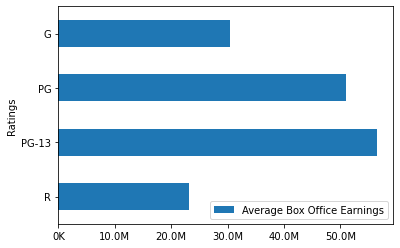

In [63]:
rating_bar(r,pg_13,pg,g)

In [59]:
def rating_bar(r,pg_13,pg,g):
    df = pd.DataFrame({
    'Ratings':['R','PG-13','PG','G'],
    'Average Box Office Earnings':[r,pg_13,pg,g]})
    ax=df.plot.barh(x='Ratings',y='Average Box Office Earnings')
    ax.xaxis.set_major_formatter(format_num)
    

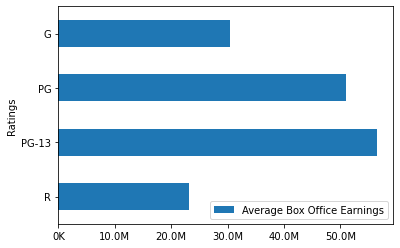

In [128]:
df = pd.DataFrame({
    'Ratings':['R','PG-13','PG','G'],
    'Average Box Office Earnings':[r,pg_13,pg,g]})
ax=df.plot.barh(x='Ratings',y='Average Box Office Earnings')
ax.xaxis.set_major_formatter(format_num)

*********************************************************************************************************************
CURRENT WORK ZONE
********************************************************************************************************************

In [9]:
movie_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [22]:
descriptive_movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [122]:
rel=descriptive_movie_info_df.loc[descriptive_movie_info_df.box_office.isna()==False]
rel.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures


In [103]:
rel.runtime.apply(lambda x: str(x))

0      108 minutes
1       82 minutes
2      123 minutes
3      117 minutes
4      108 minutes
          ...     
335    119 minutes
336    129 minutes
337     98 minutes
338     97 minutes
339    106 minutes
Name: runtime, Length: 340, dtype: object

<ipython-input-120-7bc96d78c69c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel.dropna(inplace=True)


In [113]:
for el in rel.runtime:
    print(type(el))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [107]:
rel['runtime'] = rel['runtime'].map(lambda x: x.rstrip('minutes'))

AttributeError: 'float' object has no attribute 'rstrip'

In [98]:
rel.runtime.reset_index(drop=True,inplace=True)

In [99]:
rel.runtime[0][0:-7]


'108 '

In [100]:
rel.runtime[0][-7:len(rel.runtime[0])]

'minutes'

In [91]:
rel.runtime.head()

0    
1    
2    
3    
4    
Name: runtime, dtype: object

In [89]:
def clear_mins(col):
    
    
        

In [14]:
movie_ratings_df.numvotes.value_counts()

6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64

In [18]:
for i in range(30):
    print('The average rating for '+str(i)+'number of votes is '+
         str(
         movie_ratings_df.loc
         [movie_ratings_df.numvotes==i].
         averagerating.mean()))
    print('\n')

The average rating for 0number of votes is nan


The average rating for 1number of votes is nan


The average rating for 2number of votes is nan


The average rating for 3number of votes is nan


The average rating for 4number of votes is nan


The average rating for 5number of votes is 6.879807336050389


The average rating for 6number of votes is 6.878991304347825


The average rating for 7number of votes is 6.818780290791601


The average rating for 8number of votes is 6.878172588832487


The average rating for 9number of votes is 6.7965785381026445


The average rating for 10number of votes is 6.850175029171529


The average rating for 11number of votes is 6.754343293954135


The average rating for 12number of votes is 6.790181818181818


The average rating for 13number of votes is 6.758880597014925


The average rating for 14number of votes is 6.7213298791019


The average rating for 15number of votes is 6.738155515370705


The average rating for 16number of votes is 6.63122568093

In [13]:

movie_ratings_df.loc[movie_ratings_df.numvotes==6].averagerating.mean()

6.878991304347825

In [130]:
dmi_df.genre.value_counts()

Drama                                                             48
Comedy                                                            40
Comedy|Drama                                                      26
Drama|Mystery and Suspense                                        13
Comedy|Drama|Romance                                              11
                                                                  ..
Drama|Science Fiction and Fantasy|Romance                          1
Art House and International|Comedy|Drama|Mystery and Suspense      1
Art House and International|Documentary                            1
Art House and International|Documentary|Drama|Special Interest     1
Action and Adventure|Animation|Kids and Family                     1
Name: genre, Length: 100, dtype: int64

In [25]:
movie_profits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [26]:
budget_and_profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB
